# PID Tuner

In [32]:
from IPython.display import display
from sympy import *
init_printing(use_latex='mathjax')

# Symbols
Kp, Ki = symbols('K_p K_i')
p, R, L = symbols('p R L')

PI = Kp * (p + Ki) / p
dc_motor = 1/(R+p*L)
G_open = PI * dc_motor
G_closed = G_open / (1 + G_open)

display(G_closed)
display(simplify(G_closed))
print(type(G_closed))

num, den = fraction(G_closed)

display('Numerator', num)
display('Denominator', simplify(den))

display(Poly(num, p).coeffs())
display(Poly(simplify(den), p).coeffs())

print(latex(Poly(num,p)))
print(latex(Poly(simplify(den),p)))

         Kₚ⋅(Kᵢ + p)         
─────────────────────────────
            ⎛Kₚ⋅(Kᵢ + p)    ⎞
p⋅(L⋅p + R)⋅⎜─────────── + 1⎟
            ⎝p⋅(L⋅p + R)    ⎠

       Kₚ⋅(Kᵢ + p)       
─────────────────────────
Kₚ⋅(Kᵢ + p) + p⋅(L⋅p + R)

<class 'sympy.core.mul.Mul'>


'Numerator'

Kₚ⋅(Kᵢ + p)

'Denominator'

Kₚ⋅(Kᵢ + p) + p⋅(L⋅p + R)

[Kₚ, Kᵢ⋅Kₚ]

[L, Kₚ + R, Kᵢ⋅Kₚ]

\operatorname{Poly}{\left( K_{p} p + K_{i} K_{p}, p, domain=\mathbb{Z}\left[K_{i}, K_{p}\right] \right)}
\operatorname{Poly}{\left( L p^{2} + \left(K_{p} + R\right) p + K_{i} K_{p}, p, domain=\mathbb{Z}\left[K_{i}, K_{p}, L, R\right] \right)}


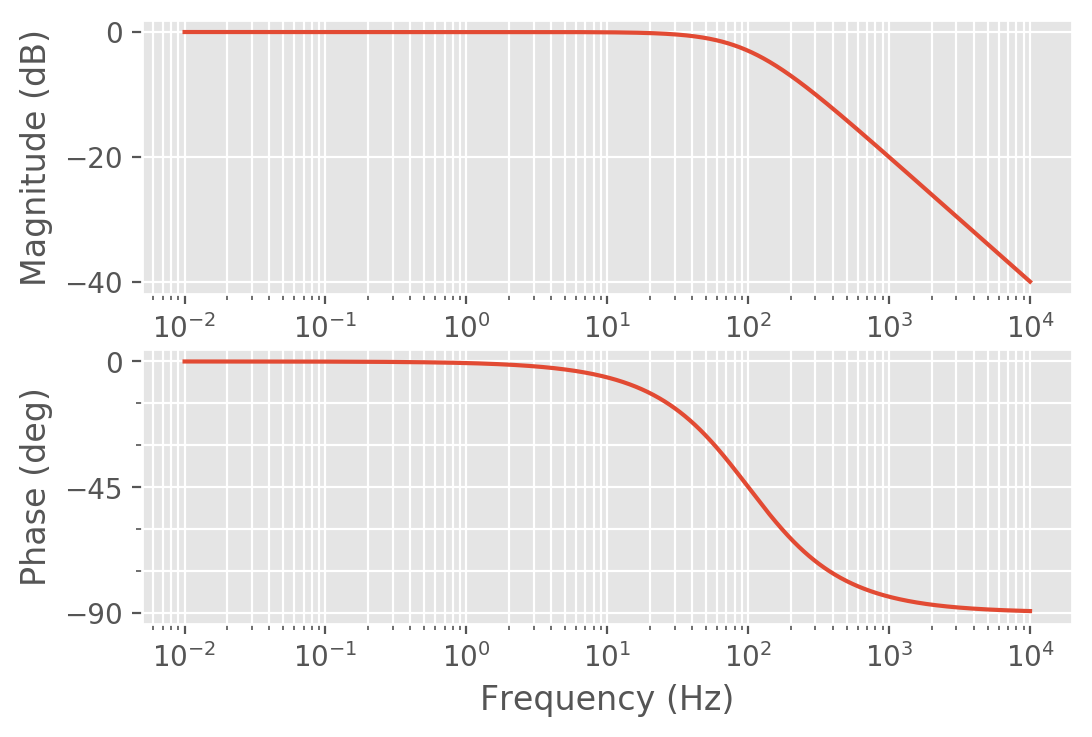

In [23]:
%matplotlib inline
from pylab import *
mpl.rcParams['figure.dpi']= 200
plt.style.use('ggplot')

from control import *

mag, phase, omega = bode_plot(tf([1],[0.01/(2*pi), 1]), 2*np.pi*np.logspace(-2,4,1000), dB=1, Hz=1, deg=1)



    1
---------
0.4 s + 3


502.7 s + 3770
--------------
      s


502.7 s + 3770
--------------
0.4 s^2 + 3 s


     502.7 s + 3770
------------------------
0.4 s^2 + 505.7 s + 3770

1 states have been removed from the model



  1257
--------
s + 1257

Kp/L = 1256.6370614359173
Kp/L/(2pi) = 200.0
0.8958524578390814 A
1.8000000000000003 ms


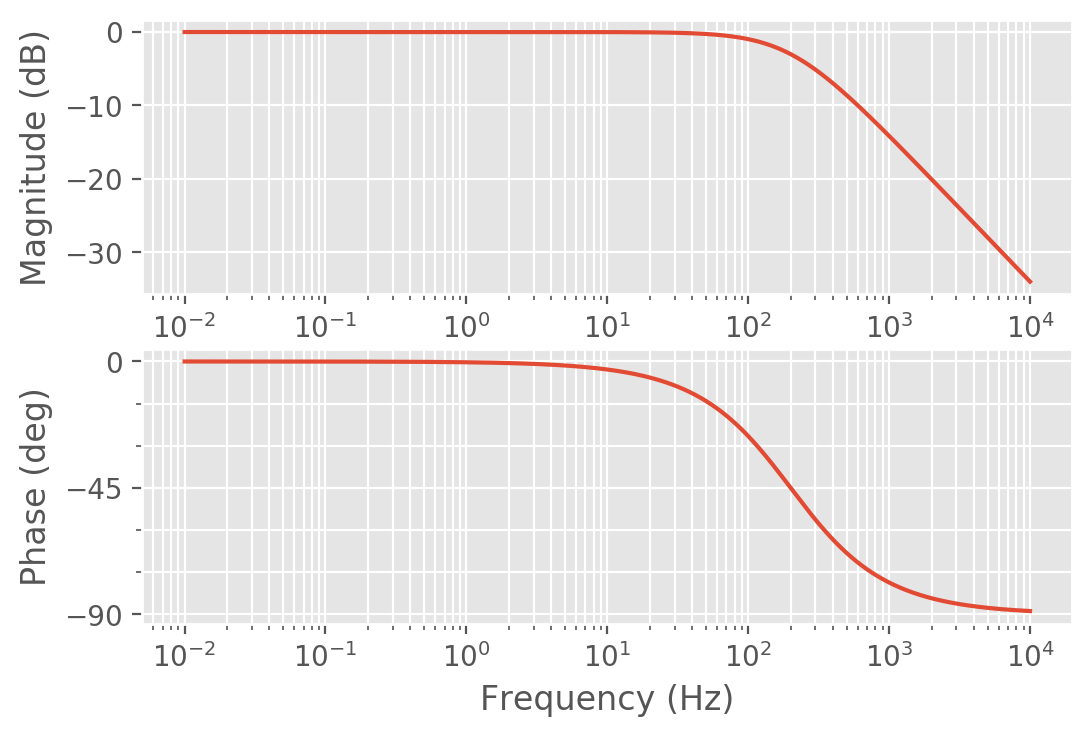

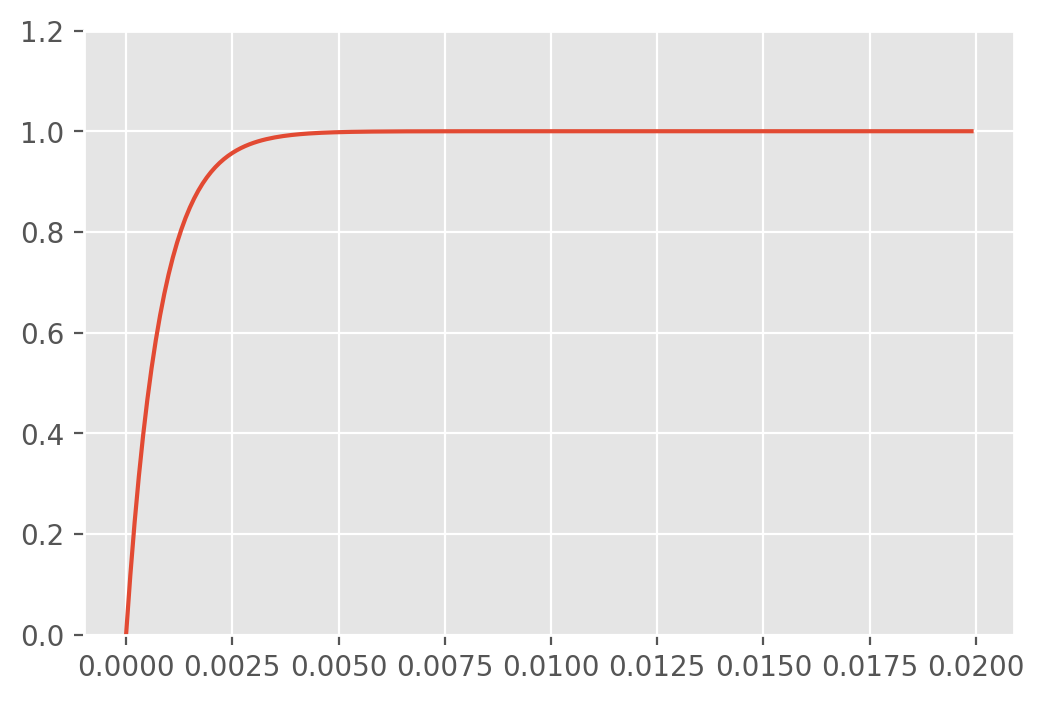

In [24]:
from pylab import np, plt

def get_coeffs_dc_motor_current_regulator(R, L, Bandwidth_Hz):
    Kp = Bandwidth_Hz * 2 * np.pi * L
    Ki = R / L
    return Kp, Ki

import control
from control import bode_plot

R = 3 # Ohm
L = 0.4 # H

Kp, Ki = get_coeffs_dc_motor_current_regulator(R, L, 200)

dc_motor = control.tf([1], [L, R])
pi_regulator = control.tf([Kp, Kp*Ki], [1, 0])
display(dc_motor)
display(pi_regulator)
# figure()
# mag, phase, omega = bode_plot(dc_motor, 2*np.pi*np.logspace(-2,4,1000), dB=1, Hz=1, deg=1)
# figure()
# mag, phase, omega = bode_plot(pi_regulator, 2*np.pi*np.logspace(-2,4,1000), dB=1, Hz=1, deg=1)

open_sys = control.series(pi_regulator, dc_motor)
closed_sys = control.feedback(open_sys, 1, sign=-1)

# open_sys = pi_regulator * dc_motor
# closed_sys = open_sys / (1+open_sys)

display(open_sys)
display(closed_sys)
closed_sys = control.minreal(closed_sys)
display(closed_sys)
print('Kp/L =', Kp/L)
print('Kp/L/(2pi) =', Kp/L/(2*np.pi))

# figure()
# mag, phase, omega = bode_plot(open_sys, 2*np.pi*np.logspace(-2,4,1000), dB=1, Hz=1, deg=1)
plt.figure()
mag, phase, omega = bode_plot(closed_sys, 2*np.pi*np.logspace(-2,4,1000), dB=1, Hz=1, deg=1)

T, yout = control.step_response(closed_sys, np.arange(0,0.02,1e-5))
plt.figure()
plt.plot(T, yout)
plt.ylim([0,1.2])

# 上升时间：
print(
    min(yout, key=lambda x:abs(x-0.9)), 'A'
) 
print(
    T[(np.abs(yout-0.9)).argmin()] * 1000, 'ms' 
)